[]

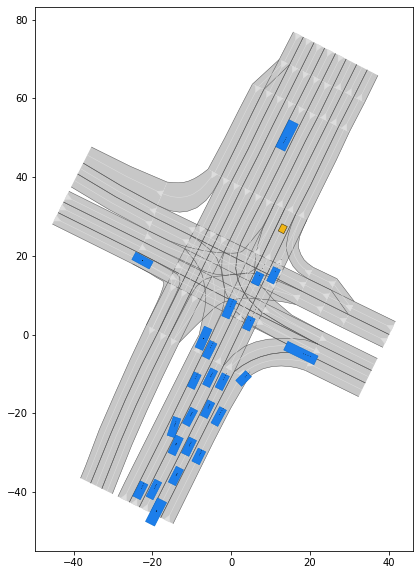

In [1]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from commonroad.common.file_reader import CommonRoadFileReader
from commonroad.visualization.renderer import MPRenderer

file_path = 'USA_Lanker-1_1_T-1.xml'

scenario, planning_problem_set = CommonRoadFileReader(file_path).open()

plt.figure(figsize=(25, 10))
rnd = MPRenderer()
scenario.draw(rnd)
planning_problem_set.draw(rnd)
rnd.render(show=True)


[]

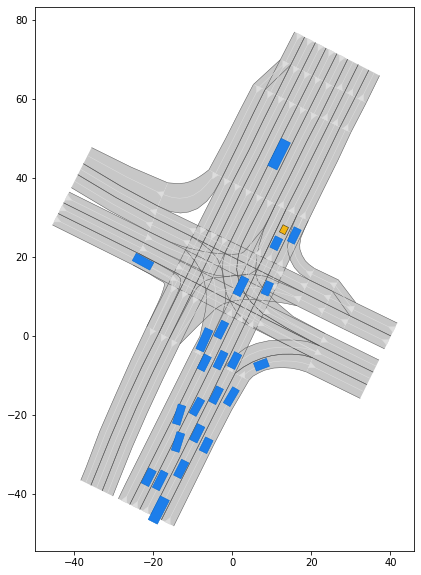

In [2]:
draw_parameters = {'time_begin': 10}

plt.figure(figsize=(25, 10))
rnd = MPRenderer()
scenario.draw(rnd, draw_params=draw_parameters)
planning_problem_set.draw(rnd)
rnd.render(show=True)

AttributeError: 'MPRenderer' object has no attribute 'by_callstack'

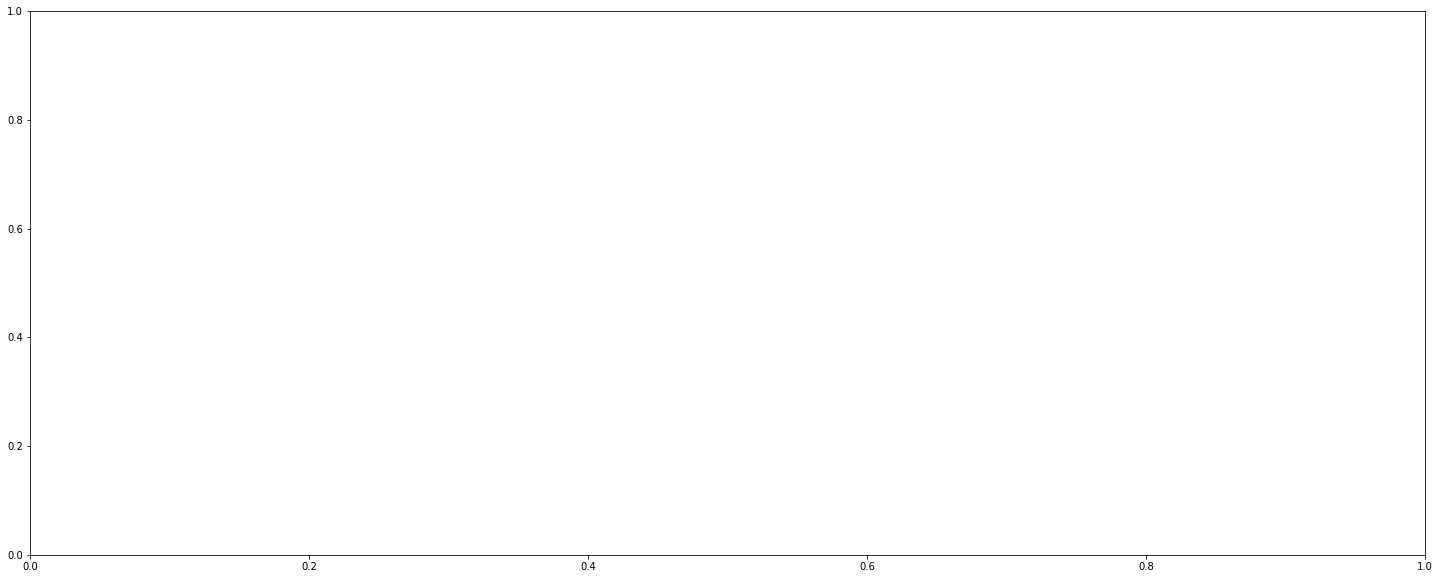

In [3]:
import numpy as np

translation = np.array([0.0, 0.0])
angle = np.pi/2

scenario.translate_rotate(translation, angle)
planning_problem_set.translate_rotate(translation, angle)

plt.figure(figsize=(25, 10))
rnd = MPRenderer(rnd)
scenario.draw(rnd)
planning_problem_set.draw(rnd)
rnd.render(show=True)

In [ ]:
from commonroad.planning.goal import GoalRegion
from commonroad.common.util import Interval, AngleInterval
from commonroad.scenario.trajectory import State

# define example goal region
goal_state_1 = State(time_step=Interval(3, 5), orientation=AngleInterval(0.1, 1), velocity=Interval(20, 30.5))
goal_state_2 = State(time_step=Interval(3, 6), orientation=AngleInterval(0.1, 1), velocity=Interval(15, 25.5))

goal_region = GoalRegion([goal_state_1, goal_state_2])

# state of the ego vehicle
state = State(time_step=3, orientation=0.5, velocity=25)

# check if the state is inside of the goal region
goal_region.is_reached(state)

In [ ]:
from commonroad.common.file_writer import CommonRoadFileWriter
from commonroad.common.file_writer import OverwriteExistingFile

fw = CommonRoadFileWriter(scenario, planning_problem_set, "author", "affiliation", "source")

filename = "filename.xml"

fw.write_to_file(filename, OverwriteExistingFile.ALWAYS)

In [ ]:
import time

from commonroad.common.solution import CommonRoadSolutionWriter, Solution, PlanningProblemSolution, VehicleModel, VehicleType, CostFunction
from commonroad.scenario.trajectory import Trajectory, State

# prepare trajectory
t_0 = time.time()
pm_state_list = list()
for i in range(10):
        pm_state_list.append(State(**{'position': np.array([i, -i]), 'velocity': i*.2, 'velocity_y': i*0.001, 'time_step': i}))

# stop 'computation time'
t_c = time.time() - t_0
trajectory_pm = Trajectory(0, pm_state_list)

# create solution object for benchmark
pps = PlanningProblemSolution(planning_problem_id=1215,
                                vehicle_type=VehicleType.BMW_320i,
                                vehicle_model=VehicleModel.PM,
                                cost_function=CostFunction.JB1,
                                trajectory=trajectory_pm)

solution = Solution(scenario.benchmark_id, '2020a', [pps], computation_time=t_c)

# write solution to a xml file
csw = CommonRoadSolutionWriter(solution)


csw.write_to_file(overwrite=True)